In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv(r"D:\PycharmProjects\pythonProject\U23AI113\ML_lAB\LAB_3\advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [2]:
df.columns
#df_new=df[

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [3]:
df_new=df[['TV', 'Radio', 'Newspaper']]
df_new.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [11]:
m=df_new.mean()
m

TV           147.0425
Radio         23.2640
Newspaper     30.5540
dtype: float64

In [5]:
df_n=df_new.values

In [6]:
df_n[0:5]

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4]])

In [8]:
mean=np.mean(df_n,axis=1)
mean.shape

(200,)

In [9]:
mean=np.mean(df_n,axis=0)
mean

array([147.0425,  23.264 ,  30.554 ])

In [12]:
mean.shape

(3,)

In [13]:
df_nn=df_n-mean
df_nn[0:5]

array([[  83.0575,   14.536 ,   38.646 ],
       [-102.5425,   16.036 ,   14.546 ],
       [-129.8425,   22.636 ,   38.746 ],
       [   4.4575,   18.036 ,   27.946 ],
       [  33.7575,  -12.464 ,   27.846 ]])

In [14]:
C=df_nn.T@df_nn
C.shape

(3, 3)

In [15]:
C

array([[1466819.02875,   13902.636  ,   21077.971  ],
       [  13902.636  ,   43865.1208 ,   22784.8988 ],
       [  21077.971  ,   22784.8988 ,   94387.3568 ]])

In [16]:
eigvals,eigvecs = np.linalg.eigh(C)
eigvals

array([  35086.87584252,  102699.24856486, 1467285.38194262])

In [17]:
corr_matrix = df_new.corr()
corr_matrix

,TV,Radio,Newspaper
TV,1.000000,0.054809,0.056648
Radio,0.054809,1.000000,0.354104
Newspaper,0.056648,0.354104,1.000000


In [19]:
corr_matrix = pd.DataFrame(df_nn).corr()
corr_matrix

,0,1,2
0,1.000000,0.054809,0.056648
1,0.054809,1.000000,0.354104
2,0.056648,0.354104,1.000000


In [20]:
eigvecs

array([[ 0.00380577, -0.01807077, -0.99982947],
       [-0.93391214,  0.35736234, -0.01001377],
       [ 0.35748236,  0.93379098, -0.01551648]])

In [22]:
order = np.argsort(eigvals)[::-1]#why always increasing order
order

array([2, 1, 0])

In [23]:
eigvals=eigvals[order]
eigvals

array([1467285.38194262,  102699.24856486,   35086.87584252])

In [25]:
eigvecs=eigvecs[:,order]
eigvecs

array([[-0.99982947, -0.01807077,  0.00380577],
       [-0.01001377,  0.35736234, -0.93391214],
       [-0.01551648,  0.93379098,  0.35748236]])

In [30]:
def recon_error_n(n):
    E=eigvecs[:,:n]
    Wproj=df_nn @ E
    L=Wproj@E.T
    R=L+mean
    sse=np.sum((df_nn-R)**2)
    mse_per_entry = sse/df_nn.shape[0] * df_nn.shape[1]
    explained = np.sum(eigvals[:n])/np.sum(eigvals)
    return sse, mse_per_entry,explained


In [31]:
import pandas as pd
rows = []
for n in range(1, df_nn.shape[1] + 1):
    sse, mse, exp = recon_error_n(n)
    rows.append({"n_components": n,
                 "SSE": sse,
                 "MSE_per_entry": mse,
                 "Explained_Variance(%)": 100 * exp})

df = pd.DataFrame(rows)

In [32]:
df

,n_components,SSE,MSE_per_entry,Explained_Variance(%)
0,1,4.757038e+06,71355.564121,91.415577
1,2,4.654338e+06,69815.075392,97.813999
2,3,4.619251e+06,69288.772255,100.000000


('D:\\PycharmProjects\\pythonProject\\U23AI113\\ML_lAB\\LAB_3\\pca_reconstruction_error.png',
    n_components           SSE  MSE_per_entry  Explained_Variance(%)
 0             1  4.757038e+06   71355.564121              91.415577
 1             2  4.654338e+06   69815.075392              97.813999
 2             3  4.619251e+06   69288.772255             100.000000)

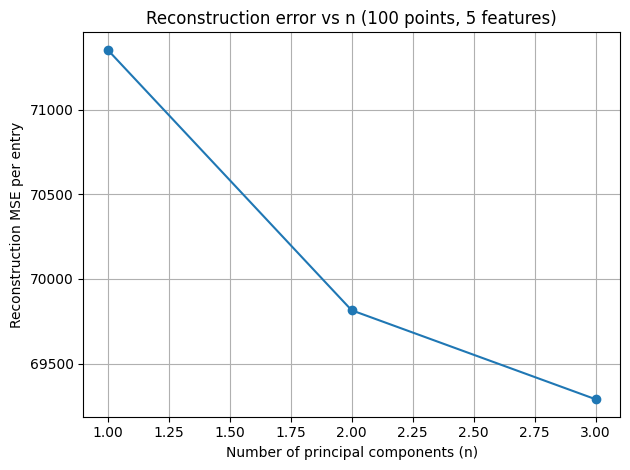

In [ ]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure()
plt.plot(df["n_components"], df["MSE_per_entry"], marker='o')
plt.xlabel("Number of principal components (n)")
plt.ylabel("Reconstruction MSE per entry")
plt.title("Reconstruction error vs n (100 points, 3 features)")
plt.grid(True)
plt.tight_layout()

# Save the plot
plot_path = r"D:\PycharmProjects\pythonProject\U23AI113\ML_lAB\LAB_3\pca_reconstruction_error.png"
plt.savefig(plot_path)

# Display both outputs
plot_path, df.head()

In [39]:
E=eigvecs[:,:1]
Wproj=df_nn @ E
L=Wproj@E.T
R=L+mean
df_n[0:5]

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4]])

In [38]:
R[0:5]

array([[230.81675719,  24.10303943,  31.85410296],
       [ 44.92118839,  22.24120601,  28.96916685],
       [ 18.07201301,  21.97229862,  28.55249121],
       [152.11260692,  23.31477956,  30.63268361],
       [181.09569519,  23.60505911,  31.08247571]])

In [40]:
E=eigvecs[:,:2]
Wproj=df_nn @ E
L=Wproj@E.T
R=L+mean
df_n[0:5]

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4]])

In [41]:
R[0:5]

array([[230.09788394,  38.319268  ,  69.00123489],
       [ 44.53869143,  29.80535476,  48.73435491],
       [ 17.22962094,  38.6311994 ,  72.08234736],
       [151.52601954,  34.91496118,  60.94406153],
       [180.71732655,  31.08756738,  50.63433649]])